In [49]:
# Survived 1
# Not Survived 0

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv("titanic.csv")

In [52]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
dt = data.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"], axis = 'columns')

In [54]:
dt.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [55]:
dt.shape

(891, 5)

In [56]:
dt['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [57]:
x = dt.drop('Survived', axis='columns')
y = dt["Survived"]

In [58]:
print(x)
print(y)

     Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
888       3  female   NaN  23.4500
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[891 rows x 4 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [59]:
x.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [60]:
x.isnull().sum() 

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [61]:
x.Age = x.Age.fillna(x.Age.mean())

In [62]:
x

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
l1 = LabelEncoder()

In [65]:
x['sex'] = l1.fit_transform(x['Sex'])
x

,Pclass,Sex,Age,Fare,sex
0,3,male,22.000000,7.2500,1
1,1,female,38.000000,71.2833,0
2,3,female,26.000000,7.9250,0
3,1,female,35.000000,53.1000,0
4,3,male,35.000000,8.0500,1
...,...,...,...,...,...
886,2,male,27.000000,13.0000,1
887,1,female,19.000000,30.0000,0
888,3,female,29.699118,23.4500,0
889,1,male,26.000000,30.0000,1


In [66]:
x = x.drop(["Sex"], axis = 'columns')

In [67]:
x

,Pclass,Age,Fare,sex
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [70]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [71]:
print(x.shape, X_train.shape , X_test.shape)

(891, 4) (712, 4) (179, 4)


In [72]:
print(y.shape, Y_train.shape , Y_test.shape)

(891,) (712,) (179,)


In [73]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [74]:
Y_predicted = model.predict(X_test)

In [75]:
Y_predicted

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [79]:
model.score(X_test, Y_test)

0.8100558659217877

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
cn = confusion_matrix(Y_predicted,Y_test) 
cn

array([[94, 21],
       [13, 51]], dtype=int64)

Text(24.0, 0.5, 'Truth')

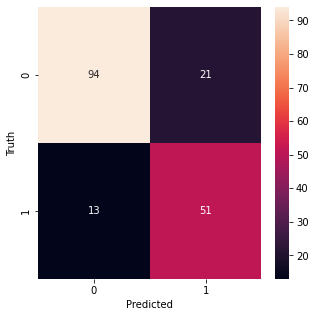

In [82]:
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(cn, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [83]:
print(X_test)
print(Y_test)

     Pclass        Age     Fare  sex
684       2  60.000000  39.0000    1
646       3  19.000000   7.8958    1
40        3  40.000000   9.4750    0
324       3  29.699118  69.5500    1
255       3  29.000000  15.2458    0
..      ...        ...      ...  ...
134       2  25.000000  13.0000    1
415       3  29.699118   8.0500    0
117       2  29.000000  21.0000    1
487       1  58.000000  29.7000    1
715       3  19.000000   7.6500    1

[179 rows x 4 columns]
684    0
646    0
40     0
324    0
255    1
      ..
134    0
415    0
117    0
487    0
715    0
Name: Survived, Length: 179, dtype: int64


In [84]:
input_data = (  1  ,22.000000   ,66.6000    ,0)

numpy_array= np.asarray(input_data)              # changing the input data to numpy array
reshaped_array = numpy_array.reshape(1,-1)       # reshaping the array as we are predicting for one instance

prediction = model.predict(reshaped_array)
print(prediction)

if (prediction[0]==0):
  print('Passenger Not Survived on titanic.')
else:
  print('Passenger Survived on titanic.')


[1]
Passenger Survived on titanic.
